## Multi Armed Bandit Problem

The multi-armed bandit problem is a classic problem in reinforcement learning. It is a problem where an agent has to choose between different actions, each with an unknown reward. The agent has to learn which action is the best and exploit it to maximize its reward.

In this notebook, I have implemented Random Selection, Greedy Algorithm, Optimistic Greedy Algorithm, Decaying Greedy Algorithm and Upper Confidence Bound (UCB) algorithm to solve the multi-armed bandit problem. I have also compared the performance of these algorithms.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed=69)
epochs = 2000
arms = 10
runs = 1000

In [7]:
class Bandit:
    def __init__(self, num_arms, mean_arms):
        self.num_arms = num_arms
        self.mean_arms = mean_arms
        self.best_arm = np.argmax(mean_arms)

    def arm_reward_generator(self, choice):
        return np.random.normal(loc=self.mean_arms[choice], scale=1.0)

bandit = Bandit(arms, (np.random.rand(arms))*5)

In [8]:
# Types
# 0. Random
# 1. ɛ-Greedy
# 2. Optimistic-ɛ-Greedy
# 3. Decaying-ɛ-Greedy
# 4. Upper Confidence Bound


class Model:
    def __init__(self, eps=0.1, type='ɛ-Greedy', factor=1):
        self.reward_record_for_run = np.array([])
        self.optimal_record_for_run = np.array([])
        self.cum_reward = 0
        self.t = 0
        self.arm_freq = np.zeros(bandit.num_arms)
        self.Q = np.zeros(bandit.num_arms)
        self.eps = eps
        self.type = type
        self.average = 0
        self.factor = factor
        self.average_reward_record = np.array([])
        self.average_optimal_record = np.array([])
        for i in range(runs):
            self.train(epochs)
            self.average_reward_record = np.append(self.average_reward_record, self.reward_record_for_run)
            self.average_optimal_record = np.append(self.average_optimal_record, self.optimal_record_for_run)
            self.reset(eps, type)
        self.average_reward_record = self.average_reward_record.reshape(runs, epochs)
        self.average_optimal_record = self.average_optimal_record.reshape(runs, epochs)
        self.average_reward_record = np.mean(self.average_reward_record, axis=0)
        self.average_optimal_record = np.mean(self.average_optimal_record, axis=0)


    def next_choice(self, Q, T):

        if (self.type == 'Random'):
            choice = np.random.randint(bandit.num_arms)
            return choice
        

        elif (self.type == 'ɛ-Greedy'):
            if (self.eps == 0):
                choice = np.argmax(Q)
                return choice
            if (np.random.rand() < self.eps):
                choice = np.random.randint(bandit.num_arms)
                return choice
            choice = np.argmax(Q)
            return choice
        
        
        elif (self.type == 'Decaying-ɛ-Greedy'):
            self.eps = self.factor/np.log(T+1.1)
            if (np.random.rand() < self.eps):
                choice = np.random.randint(bandit.num_arms)
                return choice
            choice = np.argmax(Q)
            return choice
        

        elif (self.type == 'Optimistic-ɛ-Greedy'):
            self.Q = np.ones(bandit.num_arms)*self.factor
            if (np.random.rand() < self.eps):
                choice = np.random.randint(bandit.num_arms)
                return choice
            choice = np.argmax(Q)
            return choice


        elif (self.type == 'UCB'):
            if (T < bandit.num_arms):
                choice = T
                return choice
            choice = np.argmax(Q + np.sqrt(np.log(T)/self.arm_freq))
            return choice
        

    def update(self, choice, reward):
        self.arm_freq[choice] += 1
        self.cum_reward += reward
        self.Q[choice] = self.Q[choice] + \
            (reward - self.Q[choice])/self.arm_freq[choice]
        self.t += 1
        self.reward_record_for_run = np.append(
            self.reward_record_for_run, self.cum_reward/self.t)
        self.optimal_record_for_run = np.append(
            self.optimal_record_for_run, self.arm_freq[bandit.best_arm]/self.t)


    def train(self, epochs):
        for T in range(epochs):
            choice = self.next_choice(self.Q, T)
            reward = bandit.arm_reward_generator(choice)
            self.update(choice, reward)
        self.average = self.cum_reward/epochs


    def reset(self, eps=0.1, type='Greedy'):
        self.reward_record_for_run = np.array([])
        self.optimal_record_for_run = np.array([])
        self.cum_reward = 0
        self.t = 0
        self.arm_freq = np.zeros(bandit.num_arms)
        self.Q = np.zeros(bandit.num_arms)
        self.eps = eps
        self.type = type
        self.average = 0

In [9]:
Random = Model(type='Random')
Greedy = Model(eps=0, type='ɛ-Greedy')
Optimistic = Model(eps=0.1, type='Optimistic-ɛ-Greedy', factor=5)
Decaying = Model(eps=0.1, type='Decaying-ɛ-Greedy', factor=5)
UpperCB = Model(type='UCB')

In [10]:
x = np.arange(1, epochs+1)
y1 = Random.average_reward_record
z1 = Random.average_optimal_record
y2 = Greedy.average_reward_record
z2 = Greedy.average_optimal_record
y3 = Optimistic.average_reward_record
z3 = Optimistic.average_optimal_record
y4 = Decaying.average_reward_record
z4 = Decaying.average_optimal_record
y5 = UpperCB.average_reward_record
z5 = UpperCB.average_optimal_record

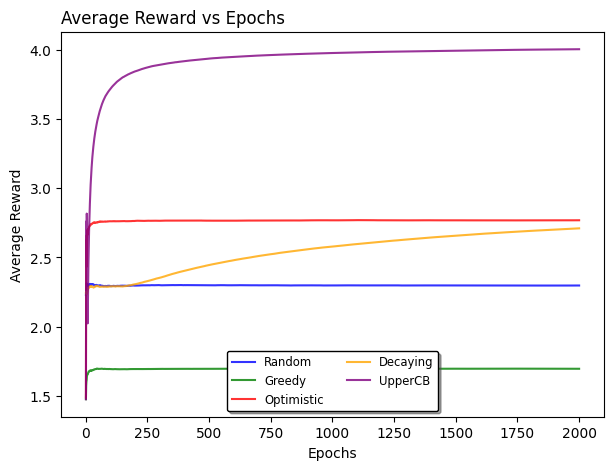

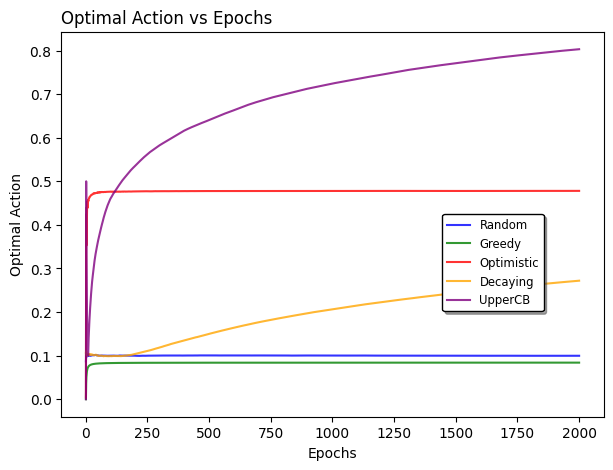

In [11]:
plt.figure(figsize=(7, 5))
plt.title("Average Reward vs Epochs", loc='left')
plt.xlabel("Epochs")
plt.ylabel("Average Reward")
plt.plot(x, y1, color="blue", alpha=0.8)
plt.plot(x, y2, color="green", alpha=0.8)
plt.plot(x, y3, color="red", alpha=0.8)
plt.plot(x, y4, color="orange", alpha=0.8)
plt.plot(x, y5, color="purple", alpha=0.8)

plt.legend(["Random", "Greedy", "Optimistic", "Decaying", "UpperCB"], facecolor='w',
           loc='lower center', ncol=2, shadow=True, edgecolor='black', fontsize='small')
plt.show()



plt.figure(figsize=(7, 5))
plt.title("Optimal Action vs Epochs", loc='left')
plt.xlabel("Epochs")
plt.ylabel("Optimal Action")
plt.plot(x, z1, color="blue", alpha=0.8)
plt.plot(x, z2, color="green", alpha=0.8)
plt.plot(x, z3, color="red", alpha=0.8)
plt.plot(x, z4, color="orange", alpha=0.8)
plt.plot(x, z5, color="purple", alpha=0.8)

plt.legend(["Random", "Greedy", "Optimistic", "Decaying", "UpperCB"], facecolor='w',
              loc='center right', ncol=1, shadow=True, edgecolor='black', fontsize='small', bbox_to_anchor=(0.9, 0.4))
plt.show()

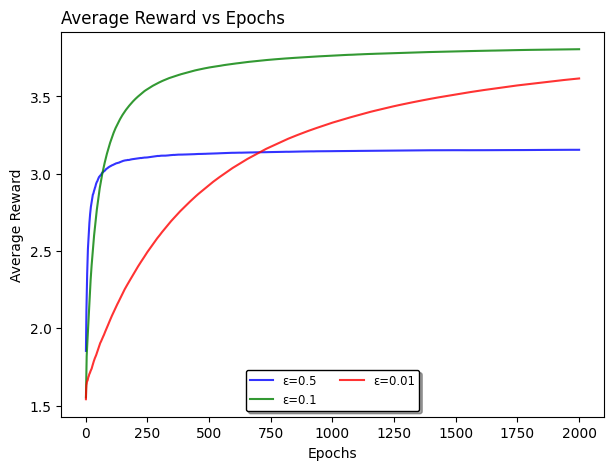

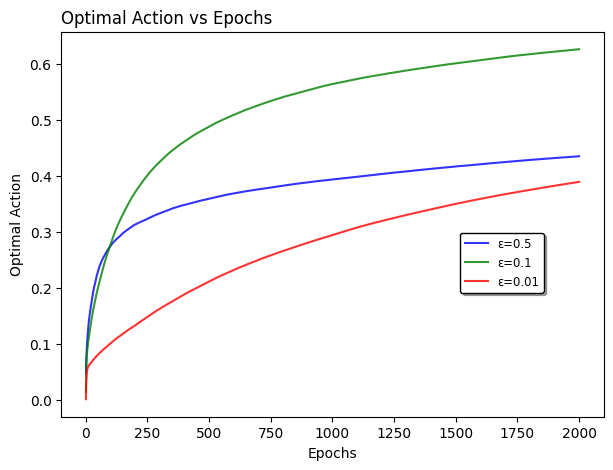

In [12]:
Greedy0_5 = Model(eps=0.5, type='ɛ-Greedy')
Greedy0_1 = Model(eps=0.1, type='ɛ-Greedy')
Greedy0_01 = Model(eps=0.01, type='ɛ-Greedy')

x = np.arange(1, epochs+1)
gy1 = Greedy0_5.average_reward_record
gy2 = Greedy0_1.average_reward_record
gy3 = Greedy0_01.average_reward_record
gz1 = Greedy0_5.average_optimal_record
gz2 = Greedy0_1.average_optimal_record
gz3 = Greedy0_01.average_optimal_record

plt.figure(figsize=(7, 5))
plt.title("Average Reward vs Epochs", loc='left')
plt.xlabel("Epochs")
plt.ylabel("Average Reward")
plt.plot(x, gy1, color="blue", alpha=0.8)
plt.plot(x, gy2, color="green", alpha=0.8)
plt.plot(x, gy3, color="red", alpha=0.8)

plt.legend(["ɛ=0.5", "ɛ=0.1", "ɛ=0.01"], facecolor='w',
              loc='lower center', ncol=2, shadow=True, edgecolor='black', fontsize='small')
plt.show()

plt.figure(figsize=(7, 5))
plt.title("Optimal Action vs Epochs", loc='left')
plt.xlabel("Epochs")
plt.ylabel("Optimal Action")
plt.plot(x, gz1, color="blue", alpha=0.8)
plt.plot(x, gz2, color="green", alpha=0.8)
plt.plot(x, gz3, color="red", alpha=0.8)

plt.legend(["ɛ=0.5", "ɛ=0.1", "ɛ=0.01"], facecolor='w',
                loc='center right', ncol=1, shadow=True, edgecolor='black', fontsize='small', bbox_to_anchor=(0.9, 0.4))
plt.show()